# Autoregression (AR)

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [25]:
# time series dataset
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, parse_dates = True, squeeze=True)
print(series.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


## Check for Autocorrelation
First, we need to check if there is an autocorrelation in our time
series dataset

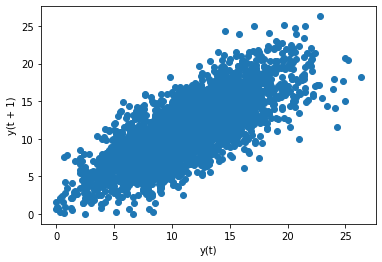

In [26]:
pd.plotting.lag_plot(series)
plt.show()

In [32]:
# Check Pearson correlation coefficient
# Create lag feature for dataset:
values = pd.DataFrame(series.values)
df_lag = pd.concat([values.shift(1), values], axis = 1)[1:]
df_lag.columns = ['t', 't+1']
print(df_lag.head())
# Paerson correlation coeff:
print(df_lag.corr())



      t   t+1
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8
5  15.8  15.8
           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


## Autocorrelation Plots
We need to find which lag feature to use

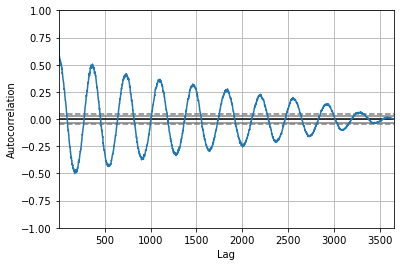

In [43]:
# pandas.plotting.autocorrelation_plot()
# x-axis is the index, y-axis is the autocorrelation coeff
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series.values)
plt.show()

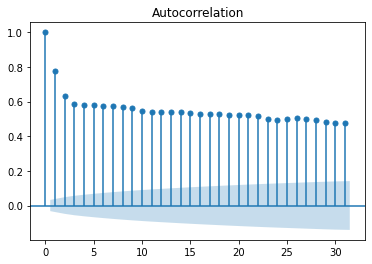

In [66]:
#statsmodels.graphics.tsaplots.plot_acf()
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31) # limit the ag variables evaluated to 31 for readability
plt.show()

## Autoregression model

In [70]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# split train - test
# last 7 elements of the dataset will be test set. The rest is train set:
X = series.values
train, test = X[:len(X)-7], X[len(X)-7 :]

# train model
model = AutoReg(train, lags=29) #using 29 days prior to predict
model_fit = model.fit()
print('Coefficients: %s'% model_fit.params)

Coefficients: [ 0.5597728   0.58866203 -0.09081226  0.04816399  0.03999111  0.03936764
  0.02594672  0.04467485  0.01314313  0.03714477 -0.00064057  0.00493921
  0.01802399  0.02696084  0.00062344  0.02445702  0.00735302  0.00992487
  0.03438475 -0.00909555  0.02416519  0.01856562  0.01229534 -0.01851848
 -0.00171714  0.01671254  0.019966    0.00963099  0.00636304 -0.0015663 ]
<class 'statsmodels.tsa.ar_model.AutoReg'>
<class 'statsmodels.tsa.ar_model.AutoRegResultsWrapper'>


predicted=11.872160209672328, expected=12.9
predicted=13.055703960083838, expected=14.6
predicted=13.531809505246462, expected=14.0
predicted=13.242590491060568, expected=13.6
predicted=13.091563770347374, expected=13.5
predicted=13.14608181176781, expected=15.7
predicted=13.176492408631823, expected=13.0
Test RMSE: 1.225


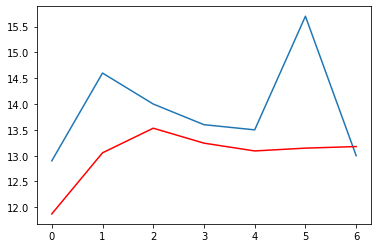

In [83]:
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

for i in range(len(predictions)):
    print('predicted={}, expected={}'.format(predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: {:.3f}'.format(rmse))

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()